## Question:-4 

          1. Download and/or upload Iris classification data set in python (from sklearn import datasets (), then iris = datasets.load_iris()). It has Four features (Sepal Length, Sepal Width, Petal Length and Petal Width) and three class labels (Setosa, Versicolour, and Virginica).

          2. Generate Synthetic Classification data set having 2000 sample points, three (3) different classes and 15 features using make_classification() in Python.

     Then apply Minimum Distance Classifier, K-NN classifier, Decision Tree Classifier, SVM Classifiers, Bagging Classifier, Boosting Classifier models and calculate the measures of performances (viz. Precision, Recall, F-Measure, CV-Score), and plot AUC-ROC curve, and respective confusion matrices.

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()

# Create a DataFrame with features and target
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Display the first few rows of the DataFrame
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [2]:
from sklearn.datasets import make_classification

# Generate synthetic classification dataset
X_synthetic, y_synthetic = make_classification(n_samples=2000, n_features=15, n_classes=3, n_informative=3, n_clusters_per_class=1, random_state=42)

# Display the shape of the synthetic dataset
print("Shape of synthetic dataset:", X_synthetic.shape, y_synthetic.shape)

Shape of synthetic dataset: (2000, 15) (2000,)


In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [4]:
# Load the Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

In [5]:
# Split the Iris dataset into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

In [6]:
# Define classifiers
classifiers = {
    "Minimum Distance Classifier": QuadraticDiscriminantAnalysis(),
    "K-NN Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "SVM Classifier": SVC(probability=True),
    "Bagging Classifier": BaggingClassifier(),
    "Boosting Classifier": AdaBoostClassifier(algorithm='SAMME')
}

Classifier: Minimum Distance Classifier
Performance Measures (Iris dataset):
Precision: 0.9694444444444444
Recall: 0.9666666666666667
F1-score: 0.9664109121909632
CV Score: 0.9800000000000001
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


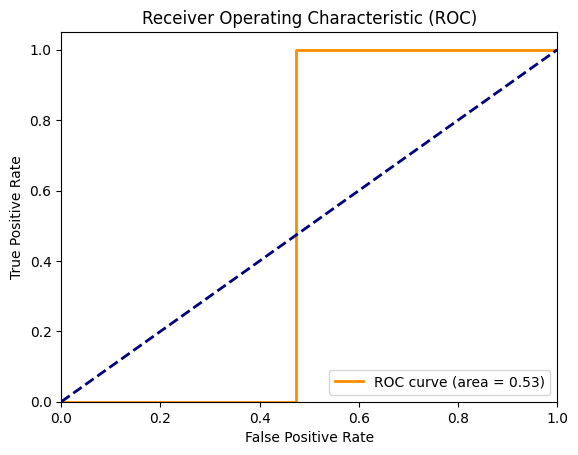



Classifier: K-NN Classifier
Performance Measures (Iris dataset):
Precision: 1.0
Recall: 1.0
F1-score: 1.0
CV Score: 0.9733333333333334
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


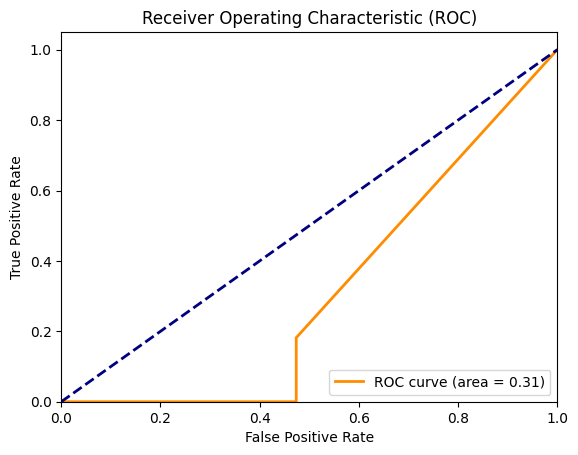



Classifier: Decision Tree Classifier
Performance Measures (Iris dataset):
Precision: 1.0
Recall: 1.0
F1-score: 1.0
CV Score: 0.9600000000000002
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


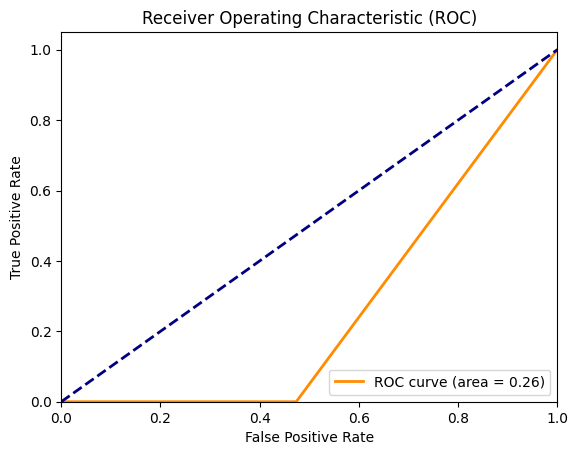



Classifier: SVM Classifier
Performance Measures (Iris dataset):
Precision: 1.0
Recall: 1.0
F1-score: 1.0
CV Score: 0.9666666666666666
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


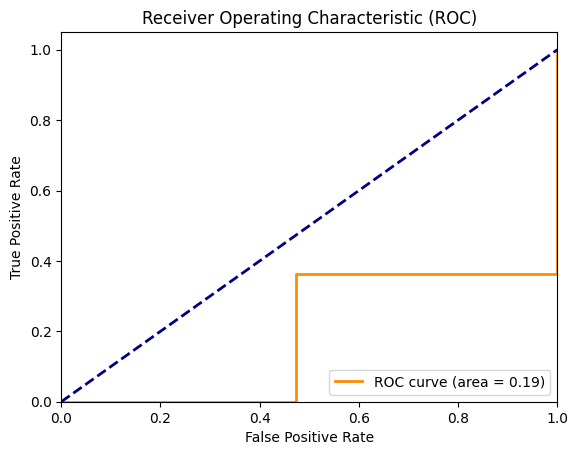



Classifier: Bagging Classifier
Performance Measures (Iris dataset):
Precision: 1.0
Recall: 1.0
F1-score: 1.0
CV Score: 0.9600000000000002
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


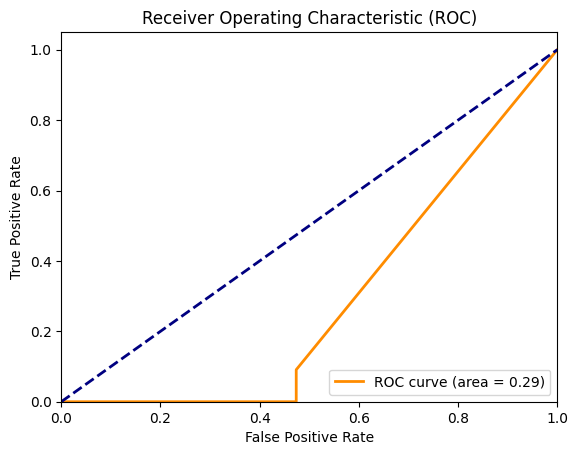



Classifier: Boosting Classifier
Performance Measures (Iris dataset):
Precision: 0.9333333333333333
Recall: 0.9333333333333333
F1-score: 0.9333333333333333
CV Score: 0.9533333333333334
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


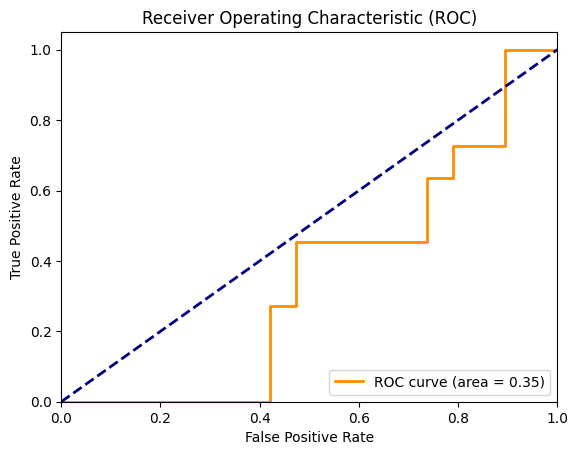

In [7]:
# Loop through classifiers
for name, clf in classifiers.items():
    # Fit the classifier
    clf.fit(X_train_iris, y_train_iris)
    
    # Make predictions
    y_pred_iris = clf.predict(X_test_iris)
    y_pred_proba_iris = clf.predict_proba(X_test_iris)[:, 1]
    
    # Performance measures
    precision_iris = precision_score(y_test_iris, y_pred_iris, average='weighted')
    recall_iris = recall_score(y_test_iris, y_pred_iris, average='weighted')
    f1_iris = f1_score(y_test_iris, y_pred_iris, average='weighted')
    cv_score_iris = cross_val_score(clf, X_iris, y_iris, cv=5, scoring='accuracy').mean()
    
    print(f"Classifier: {name}")
    print("Performance Measures (Iris dataset):")
    print("Precision:", precision_iris)
    print("Recall:", recall_iris)
    print("F1-score:", f1_iris)
    print("CV Score:", cv_score_iris)
    
    # Confusion matrix
    cm_iris = confusion_matrix(y_test_iris, y_pred_iris)
    print("Confusion Matrix:")
    print(cm_iris)
    
    # AUC-ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_iris, y_pred_proba_iris, pos_label=2)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    print("\n")